In [16]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df = pd.read_csv('/home/hp/DBDA/ML/machine-learning/Assignments/universities_std.csv')

In [41]:
df.head(5)

,Unnamed: 0,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [42]:
df.isnull().sum()

Unnamed: 0    0
SAT           0
Top10         0
Accept        0
SFRatio       0
Expenses      0
GradRate      0
dtype: int64

In [43]:
df.describe()

,Unnamed: 0,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,12.000000,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,7.359801,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,12.000000,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,18.000000,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df.rename(columns = {"Unnamed: 0": "index"}, inplace=True)

In [45]:
df.columns

Index(['index', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [46]:
df.shape

(25, 7)

In [47]:
df.drop(['index', 'Top10','Accept','Expenses','GradRate'], axis=1, inplace=True)

In [48]:
df.columns

Index(['SAT', 'SFRatio'], dtype='object')

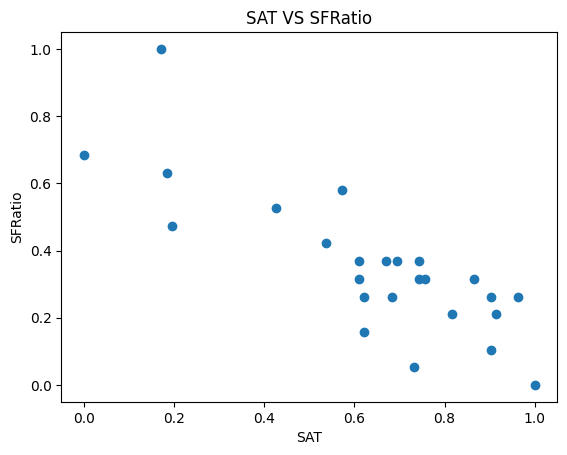

In [49]:
plt.scatter(df['SAT'],df['SFRatio'])
plt.title('SAT VS SFRatio')
plt.xlabel('SAT')
plt.ylabel('SFRatio')
plt.show()

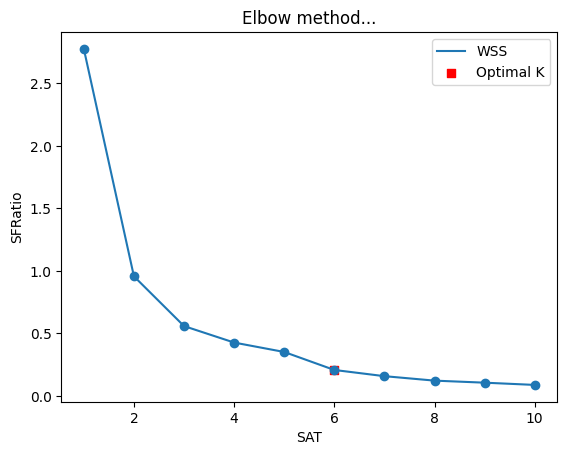

In [50]:
from sklearn.cluster import KMeans
import numpy as np
num_of_clusters = np.arange(1,11)
wss = []
for k in num_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)
    
#plot the graph
plt.plot(num_of_clusters, wss, label ='WSS')
plt.scatter(num_of_clusters[5],wss[5], color='red', label ='Optimal K', marker="s")
plt.scatter(num_of_clusters, wss)
plt.xlabel("SAT")
plt.ylabel("SFRatio")
plt.title('Elbow method...')
plt.legend()
plt.show()

In [51]:
kmeans = KMeans(n_clusters=5, random_state=12345)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=12345)

In [52]:
kmeans.labels_

array([1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 1, 1, 0, 4, 0, 4, 2, 3, 1, 3, 1,
       3, 0, 4], dtype=int32)

In [53]:
kmeans.cluster_centers_

array([[0.12682927, 0.59649123],
       [0.67560976, 0.31052632],
       [0.17073171, 1.        ],
       [0.51219512, 0.50877193],
       [0.88719512, 0.17763158]])

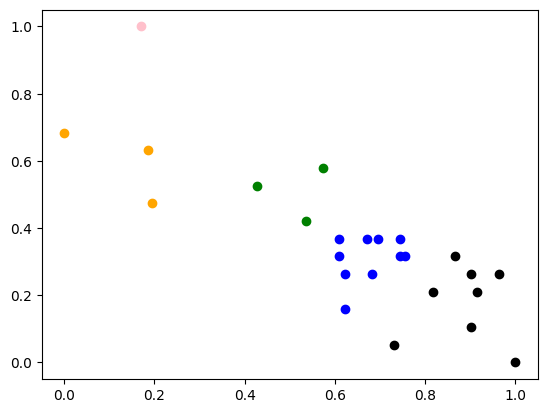

In [54]:
plt.scatter(df['SAT'][kmeans.labels_ ==0],df['SFRatio'][kmeans.labels_ ==0],color ='orange')

plt.scatter(df['SAT'][kmeans.labels_ ==1],df['SFRatio'][kmeans.labels_ ==1],color ='blue')

plt.scatter(df['SAT'][kmeans.labels_ ==2],df['SFRatio'][kmeans.labels_ ==2],color ='pink')

plt.scatter(df['SAT'][kmeans.labels_ ==3],df['SFRatio'][kmeans.labels_ ==3],color ='green')

plt.scatter(df['SAT'][kmeans.labels_ ==4],df['SFRatio'][kmeans.labels_ ==4],color ='black')



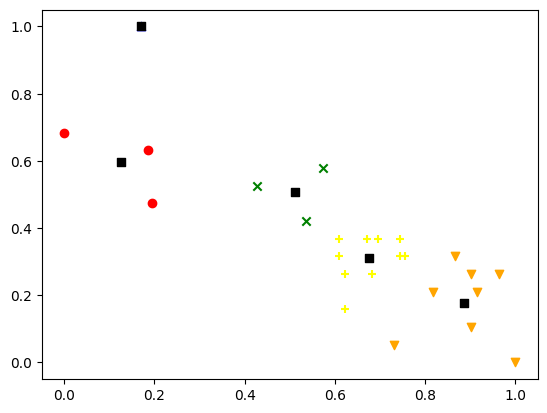

In [55]:
list = [('red',0,'o'),
       ('yellow',1,'+'),
        ('blue',2,'^'),
        ('green',3,'x'),
        ('orange',4,'v')]

for color, index, marker in list:
    plt.scatter(df['SAT'][kmeans.labels_ == index],
               df['SFRatio'][kmeans.labels_ ==index],
               color = color, marker = marker)
    
for i in range(0,len(kmeans.cluster_centers_)):
      plt.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],color="black", marker="s")

plt.show()